In [ ]:
import numpy as np
import os,sys
import matplotlib
reload(matplotlib)

matplotlib.rc('pdf', fonttype=42)

sys.path.append("D:/measuring/")
sys.path.append("D:/measuring/")
sys.path.append(r'D:/measuring/analysis')
import analysis.lib.fitting.common as fitlib
from analysis.lib.Qmemory import CarbonDephasing as CD
reload(CD)
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
%matplotlib inline

# Repump Speed

d:\measuring\data
reloaded
Using SSRO timestamp  d:\measuring\data\20160331\203029_AdwinSSRO_SSROCalibration_Pippin_SIL2
folder is  d:\measuring\data\20160330\112551_PulsarMBIElectronRamsey_Dephasing_Pippin_SIL2_Eprime_Repump_1000.0nW_0RO_p1init_1cycles


IOError: Unable to open file (Unable to open file: name = 'd:\measuring\data\20160331\203029_adwinssro_ssrocalibration_pippin_sil2\analysis.hdf5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

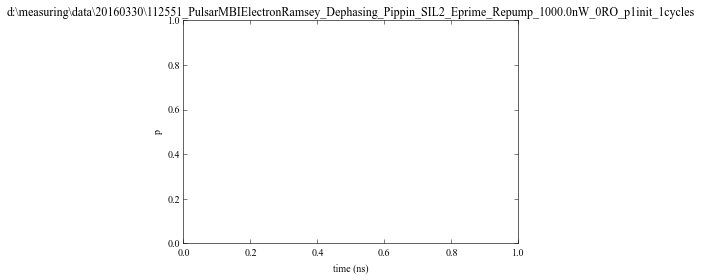

In [21]:
reload(CD)
CD.repump_speed(#timestamp='20160120_161935',
        older_than = '20160331_203030' , #remmeber this for SSRO calibration!
        powers = [1000e-9], exclude_first_n_points =0, log_plot = True,
        amplitude =0.2, decay_constant_one = 20., decay_constant_two = 400., x_offs = 0, offset=0.01, fixed = [0], 
        do_plot = True, do_fit = True, print_fit = True, plot_fit=True,  plot_fit_guess = False, 
        init_states=['p1','m1'], ro_states=['0'])

d:\measuring\data
reloaded
Using SSRO timestamp  d:\measuring\data\20150925\175238_AdwinSSRO_SSROCalibration_Pippin_SIL1


TypeError: 'NoneType' object has no attribute '__getitem__'

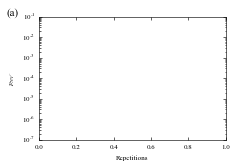

In [22]:
reload(CD)
CD.ionization_paper_plot(timestamps=['20151027_140613'],#20151105_030558',
        exclude_first_n_points =[0], decay_constant_guess = [2e3], binwidth_ns = None,
        log_plot = True, do_fit = True, show_guess = False,plot_results = True, do_print = True, colors = ['r'],
        fixed = [0], labels = [''])

In [3]:
matplotlib.rc('pdf', fonttype=42)
pdf_with_rc_fonts = {
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.sans-serif': ['Arial'],
}
matplotlib.rcParams.update(pdf_with_rc_fonts)

from matplotlib import rcParams
rcParams['xtick.major.size'] = 4
#xtick.minor.size
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['lines.linewidth'] = 1
rcParams['axes.linewidth'] = 0.6
color_list = ['b','g','y','r','brown','m','c']
CR_after_check = True ### discard events with ionization for data analysis? (this relies on the CR check after the SSRO.)
linewidth = 1
errorbar_width = 2
figwidthPRL=3.+3./8.
golden_ratio = 1.62
figsize=(figwidthPRL,figwidthPRL/1.4)
axeslabel_fontsize = 7
ticklabel_fontsize = 7
fignumber_fontsize=11
legend_fontsize = 7
markersize = 3
majorticklength = 3
minorticklength = 1.5
tickwidth = 0.6
axeswidth = 0.6
save_figure_to = 'D:\measuring\QMem_plots'

fig = plt.figure(figsize=figsize)
ax = plt.subplot()
plt.tick_params(pad = 4, axis='both', which='major', labelsize=ticklabel_fontsize, width = tickwidth, length=majorticklength)
plt.tick_params(pad = 4, axis='both', which='minor', labelsize=ticklabel_fontsize, width = tickwidth, length=minorticklength)
y_max = 500
ax.yaxis.set_ticks(np.arange(0, y_max,100))
plt.ylim(0,y_max)
plt.xlabel(r'Repump laser power ($\mu$W)', size=axeslabel_fontsize)
plt.ylabel(r'Decay time constant (ns)', size=axeslabel_fontsize)
plt.tight_layout()
yscaling = 5
fig.text(0.09,0.9, 'x'+str(yscaling),size=fignumber_fontsize, color = 'r')

plt.errorbar(powers*1000000, tau2/np.array(yscaling), yerr = tau2_err/np.array(yscaling), zorder = 500, capsize= errorbar_width, fmt = '.', ls= '', color = 'r', elinewidth=linewidth)
plt.errorbar(powers*1000000, tau, yerr = tau_err , zorder = 500, capsize= errorbar_width, fmt = '.', ls= '', color = 'k', elinewidth=linewidth)
plt.savefig(os.path.join(save_figure_to, 'Supp_repump_saturation.pdf'), format='pdf')
plt.savefig(os.path.join(save_figure_to, 'Supp_repump_saturation.png'), format='png')
plt.show()
plt.close('all')

# fig = plt.figure()
# ax = plt.subplot()
# plt.xlabel('tau2')
# plt.ylabel('tau')
# plt.ylim(0,700)
# plt.xlim(0,3500)
# plt.errorbar(tau2, tau, yerr = tau_err, xerr=tau2_err, fmt = 'o', color = 'k', label = 'x')
# plt.show()
# plt.close('all')
#plt.errorbar(tau,tau2, xerr=tau_err, yerr = tau2_err, fmt = 'o', color = 'k', label = 'x')
#print fit_result['params_dict']['tau2'], ' +- ', fit_result['error_dict']['tau2']

NameError: name 'matplotlib' is not defined

In [4]:
fig = plt.figure()
ax = plt.subplot()
plt.xlabel('tau')
plt.ylabel('tau2')
plt.ylim(0,3500)
plt.xlim(0,700)
p0, fitfunc, fitfunc_str = fitlib.fit_line(g_a=0,g_b=6.5)
x=np.arange(0,700,1)
plt.errorbar(x, fitfunc(x), fmt = '', color = 'r', label = 'x')
plt.errorbar(tau, tau2, yerr = tau2_err, xerr=tau_err, fmt = 'o', color = 'k', label = 'x')
print p0, fitfunc, fitfunc_str
fit_result = fit.fit1d(tau, tau2, None, p0 = p0, fitfunc = fitfunc, do_print = True, ret = True)
print fit_result

plot.plot_fit1d(fit_result, np.linspace(0,1.1 *np.max(tau2),1001), show_guess=True, ax=ax, plot_data=True, add_txt=False, lw=2, color = 'g')

plt.show()
plt.close('all')
#plt.errorbar(tau,tau2, xerr=tau_err, yerr = tau2_err, fmt = 'o', color = 'k', label = 'x')
#print fit_result['params_dict']['tau2'], ' +- ', fit_result['error_dict']['tau2']

NameError: name 'plt' is not defined

## Paper plot

In [5]:
reload(CD)
binwidth = [None,None,None,None,None]
binwidth = [12,12,25,25,25]
start_tstamps = ['20151105_032629','20151031_182230','20151025_235900','20151024_131500','20151024_233353' ]
stop_timestamps = [ '20151103_211016','20151030_220005','20151025_102306','20151023_193751','20151024_145547']
CD.repump_speed_paper_plot(older_than=start_tstamps, newer_than=stop_timestamps, binwidth_ns=binwidth,
        exclude_first_n_points = [5,7,2,2,2], offset = [0.,0.,0.,0.,0.], amplitude = [0.8,0.8,0.8,0.8, 0.8], 
        x0 = [0.,0.,0.,0., 0.], decay_constant_one = [50, 20,300,150,200],
        decay_constant_two = [500.,523.,800.,800.,500.],
        labels = [r'$E_{1,2}$ 2000 nW',r'$A_{1,2}$ 2000 nW',r'$A_{1,2}$ 190 nW',r'$A_{1,2}$ 100 nW',r'$A_{1,2}$ 50 nW'],
        x_offs=[0,0,0,0,0], colors=['y','g','c','b','k'], cutoff_ns = [1000,1200,1800,2500,1000],#[800,2200,1200,1500],
        plot_fit = True, do_print = False, fixed = [[0],[0],[0],[0],[0]], show_guess = False)

NameError: name 'CD' is not defined

In [6]:
reload(CD)
tstamps_E = ['20151219_215910','20151219_215525','20151219_215138']#,
tstamps_A = ['20151221_161917','20151221_161445','20151221_161024']
CD.repump_speed_pm1_paper_plot(tstamps_E=tstamps_E,tstamps_A=tstamps_A, binwidth_ns=[17,17,17], 
        labels = [r'$p_{\left|+1\right\rangle}$',r'$p_{\left|-1\right\rangle}$',r'$1-p_{\left|0\right\rangle}$'], #ssro_calib_timestamp=['20151221_160634',None],
        exclude_first_n_points_A = [6,6,6], exclude_first_n_points_E = [12,12,12], offset = [0.,0.,0.], amplitude = [0.2,0.7,0.7], x0 = [0.,0.,0.], decay_constant_one = [50,50,50], 
        decay_constant_two = [440.,440.,440.], x_offs=[-200,0,0], colors=['k','r','b','g'], cutoff_ns = [600,600,600],
        plot_fit = True, do_print = False, marker = ['+', 'x', '.'], fixed = [[0,3,4],[0,2,3],[0,2,3]], show_guess = False)

NameError: name 'CD' is not defined

# General plotting of positive and negative data

d:\measuring\data
reloaded


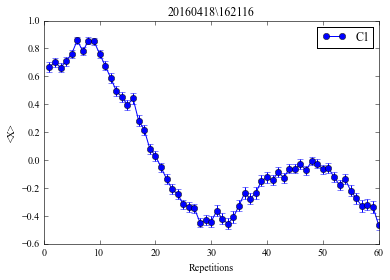

In [35]:
reload(CD)
fig = plt.figure()
ax = plt.subplot()

older_than = None
x,y1,y_u,f = CD.get_PosNeg_data('_Tomo_X_C1',older_than = older_than)
CD.plot_data(x,y1,y_u=y_u,fmt='o-')
# x,y1,y_u,f = CD.get_PosNeg_data('_Tomo_Z_C2',older_than = older_than)
# CD.plot_data(x,y1,y_u=y_u,fmt='o-')
# x,y1,y_u,f = CD.get_PosNeg_data('_Tomo_Z_C3',older_than = older_than)
# CD.plot_data(x,y1,y_u=y_u,fmt='o-')
# x,y1,y_u,f = CD.get_PosNeg_data('_Tomo_Z_C5',older_than = older_than)
# CD.plot_data(x,y1,y_u=y_u,fmt='o-')
# x,y1,y_u,f = CD.get_PosNeg_data('_Tomo_Z_C6',older_than = older_than)
# CD.plot_data(x,y1,y_u=y_u,fmt='o-')
# x,y1,y_u,f = CD.get_PosNeg_data('_statemX_Tomo_ZZ_C12',older_than = '20151023_142159')
# CD.plot_data(x,y1,y_u=y_u,fmt='o-')
# x,y1,y_u,f = CD.get_PosNeg_data('_Tomo_Y_C2')
# CD.plot_data(x,y1,y_u=y_u,fmt='o')
# x,y1,y_u,f = CD.get_PosNeg_data('_statemX_Tomo_XX_C25')
# CD.plot_data(x,y1,y_u=y_u,fmt='o-')

#test stuff
# p0, fitfunc,fitfuncstr = common.fit_cos(freq,offset,amp,phase)

# CD.fit_exp_pos_neg_data('_Tomo_X_C1')
# carbons = [1]
# for c in carbons:
#     f = CD.fit_exp_pos_neg_data('_Tomo_X_C'+ str(c))


plt.title(CD.get_tstamp_from_folder(f))
plt.xlabel('Repetitions')
plt.ylabel('<X>')
plt.legend(['C1'],loc=1)#,'logical X C25 YY','logical X C25 XY','logical X C25 YX'])
plt.savefig(os.path.join(f,'Pos_neg_data.png'),format='png')
plt.show()
plt.close('all')

# Fit exponential to positive/negative data

In [8]:
reload(CD)
import colorsys

fig = plt.figure()
ax = plt.subplot()
fit_exp = False

#### get exp decays for all carbon combinations.
i = 0
states = ['X','mX']
carbons = ['26']
N =  len(states)*len(carbons)
HSV_tuples = [(x*1.0/N, 0.7, 1.) for x in range(N)]
RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)

for state in states:
    for Cs in carbons:
        f = CD.fit_exp_pos_neg_data('_state'+state+'_Tomo_ZZ_C'+Cs,label = 'C'+Cs+' '+state,ax=ax,color=RGB_tuples[i], fmt='o')
        i+=1

# f = CD.fit_exp_pos_neg_data('_Tomo_Z_C1',label = 'C1',ax=ax, color='b', fmt='o')
# f = CD.fit_exp_pos_neg_data('_Tomo_Z_C2',label = 'C2',ax=ax, color='g', fmt='o')
# f = CD.fit_exp_pos_neg_data('_Tomo_Z_C3',label = 'C3',ax=ax, color='r', fmt='o')
# f = CD.fit_exp_pos_neg_data('_Tomo_Z_C5',label = 'C5',ax=ax, color='y', fmt='o')
# f = CD.fit_exp_pos_neg_data('_Tomo_Z_C6',label = 'C6',ax=ax, color='c', fmt='o')
#print f

#### plotting/formatting saving
plt.title(CD.get_tstamp_from_folder(f)+' 2000 nW')
plt.xlabel('Number of Repetitions')
plt.ylabel('Expectation value')
plt.legend(['C1','fit','C2','fit','C3','fit','C5','fit','C6','fit'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)#,'','C3','','C5','','C6'])
plt.savefig(os.path.join(f,'Pos_neg_fit_exponential.png'),format='png')
plt.show()
plt.close('all')

NameError: name 'CD' is not defined

# General plot of Bloch vector length

In [9]:
### routine gets raw data for 'X' and 'Y' tomography of a carbon and plots it.

reload(CD)
older_than = '20150723_094107'
#older_than = None
f_name = 'Memory_Sweep_timing_'

CD.Sweep_repetitions(carbon = '1',folder_name = f_name, older_than = older_than, do_T2correct=True, fit_result=False, return_fits=True, fitGauss=True)
#CD.Sweep_repetitions(carbon = '5',folder_name = 'Memory_Sweep_repump_time_', older_than = None, do_T2correct=False, fit_result=False, return_fits=True, fitGauss=True)
#CD.Sweep_repetitions(carbon = '3',folder_name = 'Memory_Sweep_repump_time_', older_than = older_than)
#folder_name = 'Memory_Sweep_repump_time_'
#CD.Sweep_repetitions(carbon = c,folder_name = folder_name,logicstate = 'X',return_fits=True,plot_result = True, older_than = '20151002_135716' )
#CD.Sweep_repetitions(carbon = c, folder_name = folder_name, logicstate = 'mX', return_fits=True, plot_result = True)#, older_than = '20151002_140212')

NameError: name 'CD' is not defined

In [10]:
reload(CD)
f_name = 'Memory_Sweep_repump_time_'
older_than = '20151022_190000'#'20151022_220000'
CD.avg_repump_time_paper_plot(carbons = ['1','5','2','3'], colors=['b','c','g','y'],
                              folder_name = f_name, older_than = older_than,
                              save=False, fig_name = 'Fig3a_avgRPtime', CR_after_check=True) 

NameError: name 'CD' is not defined

In [11]:
reload(CD)
f_name = 'Memory_sweep_timing_'
older_than = '20150723_094542'#'20151022_220000'
CD.t_sweep_paper_plot(carbons = ['1', '2', '5'], colors=['b','c','g'], labels = ['-37.0','+18.4','+23.7'],
        folder_name = f_name, older_than = older_than, do_Z=True,
        is_X_measurement = False, ignore_logic_state =True,fit_results=False,
        save=False, fig_name = 'Supp_tsweep', CR_after_check=True) 

NameError: name 'CD' is not defined

In [12]:
reload(CD) 
# CD.Sweep_Rep_List(carbons = ['3','6'],older_than = '20151102_080000', save=True) 
older_than = '20151102_080000'
logicstate_list = ['X']*5 # length should be equally long to the carbon list
CD.decay_vs_rep_paper_plot(DPS=False, carbons = ['6','1','5','2','3'], logicstate_list = logicstate_list,
            fit_results = True,do_T2correct=False, older_than = older_than, 
            x_max = 800, tick_spacing=200, colors = ['k','b','c','g','y'],  plotclassical = False, fig_name='Fig3_XDecay', plotlabel ='(b)')
logicstate_list = ['X','X','X','mX'] # length should be equally long to the carbon list
CD.decay_vs_rep_paper_plot(DPS=True,carbons = ['5','2','25','25'], logicstate_list = logicstate_list,
            fit_results = True,do_T2correct=False, older_than = older_than, plotclassical = False,
            x_max=2300, tick_spacing=500, colors = ['c','g','m','r'], fig_name='Fig4a_DFS', plotlabel ='(a)')

NameError: name 'CD' is not defined

In [13]:
reload(CD)
# CD.Osci_period(carbon = '5',older_than = None,freq=0,fixed = [0,1,3])
# CD.Osci_period(carbon = '2',older_than = None)
CD.Osci_period(carbon = '2',older_than = None,fit_results = True)

NameError: name 'CD' is not defined

# Coupling strength vs repetition decay

In [14]:
reload(CD)

update_data = True
try:  #does last data exist?
    dummy = lastdata
except:
    print 'No last data'
    update_data = True
    lastdata=None

do_T2correct = True
LogPlot = True

c_idents = ['1','2','3','5','6','12','13','15','16','23','25','26','35','36','56']
#c_idents = ['1','15']

older_than_list=['20151105_050000', '20151102_080000','20151026_020000','20151024_131500','20151025_030000']
labels = [r'2000 nW $E_{1,2}$', r'2000 nW $A_{1,2}$',r'190 nW $A_{1,2}$',r'100 nW $A_{1,2}$',r'50 nW $A_{1,2}$']
styles = ['yo', 'go', 'co', 'bo',  'ko']
fit_colors = ['y','g','c', 'b' ,'k']   # no color assigned means no fit is done.

lastdata = CD.coupling_vs_rep_paper_plot(c_idents=c_idents, older_than_list=older_than_list, 
                labels = labels, styles=styles, fit_colors=fit_colors, LogPlot=LogPlot, 
                fixed = [[0],[0],[0],[0],[0]], is_X_measurement = True, do_Z=False,
                update_data=update_data, lastdata = lastdata, do_T2correct=do_T2correct, 
                fit_guess = [(1,0.00044,20),(1,0.00044,20),(1,0.0006,20),(1,0.00075,20),(1,0.001,20)], fit_guess_art = (1, 0.00044,0))

NameError: name 'CD' is not defined

In [15]:
reload(CD)

update_data = True
try:  #does last data exist?
    dummy = lastdata
except:
    print 'No last data'
    update_data = True
    lastdata=None

do_T2correct_list = [False,True]
do_T2correct = False
LogPlot = True

c_idents = ['1','2','3','5','6','12','13','15','16','23','25','26','35','36','56']
#c_idents = ['1','2','3','5','6']
#c_idents = ['12','13','15','16','23','25','26','35','36','56']
#c_idents = ['1','12','25']

older_than_list=['20151102_080000', '20151102_080000']
#older_than_Z='20151027_050000'
older_than_Z='20151102_211941'
labels = ['uncorrected X decay', 'corrected X decay']
styles = ['k.', 'g.']
fit_colors = ['k','g']   # no color assigned means no fit is done.

lastdata = CD.coupling_vs_rep_paper_plot(c_idents=c_idents, older_than_list=older_than_list,older_than_Z=older_than_Z,
                labels = labels, styles=styles, fit_colors=fit_colors, LogPlot=LogPlot, 
                fixed = [[0],[0],[0],[0],[0]], return_vals=True, do_Z=True,
                update_data=update_data, lastdata = lastdata, do_T2correct=do_T2correct, do_T2correct_list =do_T2correct_list,
                fit_guess = [(1,0.00044,0), (1,0.00044,0), (1,0.00044,0)], fit_guess_art = [], legend_pos=3)

NameError: name 'CD' is not defined

In [16]:
ShortRP=[21,32,47,114]
LongRP=[275,540,675,971]
Fitted_times=[400,550,670,730]
plt.errorbar(LongRP,ShortRP,None,fmt = 'ro')
plt.ylabel('Short repump time')
plt.xlabel('Long repump time')
plt.ylim(0,150)
plt.xlim(0,1000)


NameError: name 'plt' is not defined

In [17]:
plt.errorbar(Fitted_times, LongRP, None,fmt = 'bo', label = 'long')
plt.errorbar(Fitted_times, np.array(4*np.pi)*ShortRP, None,fmt = 'ro',label='4pi * short')
plt.errorbar(np.arange(0,1500,10),np.arange(0,1500,10), None,fmt = 'y',label='y=x')
plt.legend(loc=2)
plt.ylabel('Measured repump time')
plt.xlabel('Fitted repump time')
plt.xlim(0,1500)
plt.ylim(0,1500)
print np.array(np.pi)*Fitted_times

NameError: name 'plt' is not defined

## Initialization values for various carbons (execute script 3Qubit_inits)

In [18]:
from analysis.scripts.QEC import Two_Qubit_Tomography as Tomo2
reload(Tomo2)
carbon_combinations = [[1,2,3],[1,2,5],[1,2,6],[1,3,5],[1,3,6],[1,5,6],[2,3,5],[2,3,6],[2,5,6],[3,5,6]]
# carbon_combinations = [[1,2,5]]
for kk in carbon_combinations:
    x_label,x,res,res_err = Tomo2.BarPlotTomoContrast(tag = '_'+str(kk[0])+str(kk[1])+str(kk[2])+'_init',
                                                      plot_fit = False, 
                                                      return_data = True,
                                                      save = False)
    print 'Carbons {} {} {}: {} {:.2} +- {:.2} and {} {:.2} +- {:.2}'.format(kk[0],kk[1],kk[2],x_label[0],res[0],res_err[0],x_label[1],res[1],res_err[1])

ImportError: No module named analysis.scripts.QEC

# Decay with repump power/time

In [19]:
reload(CD)
reload(fitlib)

fig = plt.figure()
ax = plt.subplot()
plt.xlabel('Pump power (uW))')
plt.ylabel('Fitted decay constant')
#plt.ylim([0,4])

update_data=True
if update_data:
    older_than ='20150903_232308'
    powers=np.array([3.5e-6, 2.7e-6, 2e-6, 1.5e-6, 1e-6, 5e-7, 2e-7, 1e-7, 6e-8, 4e-8, 3e-8])
    x1,y1,y_u1, folder = CD.repump_power_vs_repetitions(c_identifier='1', repump_powers = powers, do_T2correct=True, older_than = '20150904_121025')
    x2,y2,y_u2, folder2 = CD.repump_power_vs_repetitions(c_identifier='2', repump_powers = powers, do_T2correct=True, older_than = '20150903_232308')

plt.errorbar(powers*1e6,y1,y_u1,fmt = 'o',color = 'b', label = 'C1')
plt.errorbar(powers*1e6,y2,y_u2,fmt = 'o',color = 'g', label = 'C2')

if older_than != None:
    plt.title('older_than ' + older_than)
else:
    plt.title(CD.get_tstamp_from_folder(folder))
plt.legend()#bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(folder,'power_vs_repetitions.pdf'),format='pdf')
plt.savefig(os.path.join(folder,'power_vs_repeititons.png'),format='png')
plt.show()
plt.close('all')
    
######################### GET SHORT AND FAST PUMPING TIMESCALES AND PLOT DATA AS A FUNCTION OF THOSE

if update_data:
    tau, tau_err = CD.repump_speed_doubleExp(older_than='20150904_125052', exclude_first_n_points = 10, 
            offset = 1, amplitude_one = -0.7, amplitude_two = -0, x0 = 0, decay_constant_one = 0.06, 
            decay_constant_two = 1.06, fixed = [3,4], show_guess = True, do_print = False, 
            powers=[3500e-9, 2700e-9, 2000e-9, 1500e-9, 1000e-9, 500e-9, 200e-9, 100e-9, 60e-9, 40e-9, 30e-9], 
            plot_fit = False, plot_results = False)
    #tau = tau+np.array(0.45)

# tau2, tau_err2 = CD.repump_speed_doubleExp(timestamp='20150903_232308',#'20150903_125250',
#         exclude_first_n_points = 10, offset = 1, amplitude_one = -0.7,
#         amplitude_two = -0, x0 = 0, decay_constant_one = 0.06, 
#         decay_constant_two = 1.06, fixed = [3,4], show_guess = False, do_print = False, 
#         powers=[3500e-9, 2700e-9, 2000e-9, 1500e-9, 1000e-9, 500e-9, 200e-9, 100e-9, 60e-9, 40e-9, 30e-9], 
#         plot_fit = False, plot_results = True)

fig = plt.figure()
ax = plt.subplot()

plt.xlabel('Repump time constant (us)')
plt.ylabel('Fitted decay constant')
if False: #Log-Plot
    plt.ylim(10,500)
    ax.set_yscale("log", nonposy='clip')
else:
    plt.ylim(0,500)
plt.errorbar(tau, y1, yerr = y_u1,xerr = tau_err,fmt = 'o',color = 'b', label = 'C1')
plt.errorbar(tau, y2, yerr = y_u2,xerr = tau_err,fmt = 'o',color = 'g', label = 'C2')


p0,fitfunc,fitfunc_str =fitlib.fit_dephasing_constant_offset(1., 55.*(10**(-3)), 0.)
#p0,fitfunc,fitfunc_str =fitlib.fit_hyperbola(1., 55.*(10**(-3)), 0.07)
#p0,fitfunc,fitfunc_str =fitlib.fit_exp_decay_shifted_with_offset(0,200,0.2,0) # g_a : offset g_A : initial Amplitude g_tau : decay constant g_x0 : x offset

if True: #show guess
    ax.plot(np.linspace(0.05,1.1*np.max(tau),201), fitfunc(np.linspace(0.05,1.2,201)), ':', lw=2, color = 'r')

fit_result = fit.fit1d(np.array(tau), np.array(y1), None, p0 = p0, fitfunc = fitfunc, do_print = True, ret = True, fixed = [0])
plot.plot_fit1d(fit_result, np.linspace(0.05,1.1*np.max(tau),1001), ax=ax, plot_data=False, add_txt=False, lw=2, color = 'b')

p0,fitfunc,fitfunc_str =fitlib.fit_dephasing_constant_offset(1., 20.*(10**(-3)), 0.07)
fit_result2 = fit.fit1d(np.array(tau),np.array(y2) ,None, p0 = p0, fitfunc = fitfunc, do_print = False, ret = True,fixed = [0])
print fit_result['params_dict']
print fit_result2['params_dict']
plot.plot_fit1d(fit_result2, np.linspace(0.05,1.1 *np.max(tau),1001), ax=ax, plot_data=False, add_txt=False, lw=2, color = 'g')
if True:
    print 'saving to: ', folder
    plt.savefig(os.path.join(folder,'repumptimescale_vs_repetitions.pdf'),format='pdf')
    plt.savefig(os.path.join(folder,'repumptimescale_vs_repetitions.png'),format='png')
plt.show()
plt.close('all')


NameError: name 'CD' is not defined

##### Compareregular Pi and BB1 pulses

In [ ]:
execfile(r'D:\measuring\analysis\scripts\Quantum_Memory\LT2_compare_pi_bb1.py')

##### First plot of reps vs repump time

In [20]:
RepumpPower_uW=[1.8, 0.5, 0.1, 0.03, 0.06, 0.04, 1., 0.2, 0.46, 0.5]
RepumpTimes_fast_ns=[74.5, 115, 264, 707, 341, 647, 97.9, 162, 428, 122]
RepumpTimes_fast_us=np.array(RepumpTimes_fast_ns)/1000.
RepumpTimes_fast_Err_ns=[0.5, 10, 34, 86, 53, 69, 0.7, 14, 7, 0.9]
RepumpTimes_fast_Err=np.array(RepumpTimes_fast_Err_ns)/1000.
RepumpTimes_slow_ns=[926, 850, 1393, 2970, 1382, 3347, 1087, 1035, 1778, 1173]
RepumpTimes_slow_Err=[158, 139, 144, 686, 168, 737, 169, 130, 234, 173]
NoReps=[220, 138, 112, 72, 86, 86, 198, 158, 79, 184]
NoRepsErr=[15, 10, 10, 5, 7, 4, 14, 22, 6, 17]
plt.errorbar(RepumpTimes_fast_us, NoReps, xerr=RepumpTimes_fast_Err, yerr=NoRepsErr, fmt = 'o', label = 'fast')
#plt.errorbar(RepumpTimes_slow_ns, NoReps, xerr=RepumpTimes_slow_Err, yerr=NoRepsErr, fmt = 'o', label = 'slow')
plt.xlabel('Short repump timescale (us)')
plt.ylabel('Repetitions (1/e)')
plt.ylim(0.500)
    
g_a, g_A, g_tau = 70, 200, 150
#p0, fitfunc, fitfunc_str = fitlib.fit_exp_decay_with_offset(g_a, g_A, g_tau)
p0,fitfunc,fitfunc_str =fitlib.fit_dephasing_constant_offset(1., 100.*(10**(-3)), 0.)
#plot the initial guess

if True: #Show Guess
    plt.plot(np.linspace(0.1,1,201), fitfunc(np.linspace(0.1,1.,201)), ':', lw=2)
   
    
fit_result = fit.fit1d(np.array(RepumpTimes_fast_us),np.array( NoReps), None, p0=p0, fitfunc=fitfunc, ret=True, do_print=False,fixed=[0])

if True: ## plot data and fit
    ax = plt.subplot()
    plot.plot_fit1d(fit_result, np.linspace(0.05,1.,1001), ax=ax, plot_data=False)


NameError: name 'np' is not defined

#### ZZ decay as a function of perp hyperfine strength

In [21]:
reload(CD)


### get exp decays for all carbon combinations.
carbons = ['12','13','15','16','23','25','26','35','36','56','1','2','3','5','6']
older_than = '20151026_014111' ### 190 nW
CD.Z_decay_vs_perp_coupling(c_idents = carbons, older_than = older_than)

carbons = ['1','2','3','5','6']
older_than = '20151026_014111' ### 190 nW
CD.Z_decay_vs_perp_coupling(c_idents = carbons, older_than = older_than)

NameError: name 'CD' is not defined

#### Laser stability

In [22]:
from analysis.lib.Qmemory import CheckLaserPower as Laser; reload(Laser)

Laser.CheckPower('NewfocusAOM','ADWIN',nr_of_files=10)
Laser.CheckPower('MatisseAOM','ADWIN',nr_of_files=10)

ImportError: No module named analysis.lib.Qmemory